In [29]:
import geopandas as gpd
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
df = gpd.read_file('Counties_-_National_Statutory_Boundaries_-_2019.geojson)

https://data.gov.ie/dataset/counties-national-statutory-boundaries-2019

In [4]:
df.head()

,OBJECTID,CO_ID,ENGLISH,GAEILGE,LOGAINM_ID,GUID,CONTAE,COUNTY,PROVINCE,CENTROID_X,CENTROID_Y,AREA,SHAPE_Length,SHAPE_Area,geometry
0,1,50000,DONEGAL,Dún na nGall,100013,2ae19629-1452-13a3-e055-000000000001,Dún na nGall,DONEGAL,Ulster,607296.31,911848.45,4.860754e+09,23.413054,0.681241,"MULTIPOLYGON (((-8.08145 55.15957, -8.08144 55..."
1,2,120000,LIMERICK,Luimneach,100022,2ae19629-1440-13a3-e055-000000000001,Luimneach,LIMERICK,Munster,548318.75,640943.05,2.754926e+09,4.766632,0.364631,"MULTIPOLYGON (((-8.50852 52.74196, -8.50851 52..."
2,3,80000,KILDARE,Cill Dara,100007,2ae19629-1455-13a3-e055-000000000001,Cill Dara,KILDARE,Leinster,678993.60,712090.40,1.694083e+09,3.632523,0.227785,"MULTIPOLYGON (((-6.49499 53.35338, -6.49486 53..."
3,4,220000,WATERFORD,Port Láirge,100026,2ae19629-144b-13a3-e055-000000000001,Port Láirge,WATERFORD,Munster,630336.80,599955.37,1.857038e+09,5.543357,0.244035,"MULTIPOLYGON (((-7.59463 52.09696, -7.59459 52..."
4,5,260000,DUBLIN,Baile Átha Cliath,100002,2ae19629-144f-13a3-e055-000000000001,Baile Átha Cliath,DUBLIN,Leinster,714929.28,740960.44,9.257609e+08,4.487794,0.125039,"MULTIPOLYGON (((-6.45116 53.39150, -6.45115 53..."


In [23]:
# Convert 'COUNTY' values from Uppercase to Title case
df['COUNTY'] = df['COUNTY'].str.title()

In [48]:
data = pd.read_csv('C:/Users/dmitri.iolchin/1_NAT/CA2/safety/by_county_2013_2023.csv')
grouped = data.groupby(['County', 'Statistic Label'])['VALUE'].sum().unstack()
grouped['% Killed'] = round(grouped['Killed Casualities']/grouped['Fatal Collisions'],2)
# Reset index
grouped = grouped.reset_index()
grouped.head()

Statistic Label,County,All Fatal and Injury Collisions,All Killed and Injured Casualities,Fatal Collisions,Injured Casualites,Injury Collisions,Killed Casualities,% Killed
0,All Counties,49805,67116,1349,65669,48456,1447,1.07
1,Carlow,525,770,20,749,505,21,1.05
2,Cavan,931,1375,25,1349,906,26,1.04
3,Clare,993,1418,30,1385,963,33,1.10
4,Cork,5028,6613,140,6467,4888,146,1.04


In [49]:
map_ie = pd.merge(grouped, df, how = 'outer', left_on = 'County', right_on = 'COUNTY')
map_ie.sample(5)

,County,All Fatal and Injury Collisions,All Killed and Injured Casualities,Fatal Collisions,Injured Casualites,Injury Collisions,Killed Casualities,% Killed,OBJECTID,CO_ID,...,GUID,CONTAE,COUNTY,PROVINCE,CENTROID_X,CENTROID_Y,AREA,SHAPE_Length,SHAPE_Area,geometry
10,Kilkenny,861,1169,35,1134,826,35,1.00,21.0,90000,...,2ae19629-1456-13a3-e055-000000000001,Cill Chainnigh,Kilkenny,Leinster,647885.56,646646.11,2.071100e+09,3.369104,0.274610,"MULTIPOLYGON (((-7.16061 52.27879, -7.16064 52..."
14,Longford,532,859,23,836,509,23,1.00,13.0,130000,...,2ae19629-1441-13a3-e055-000000000001,An Longfort,Longford,Leinster,619420.92,775835.13,1.091078e+09,2.539273,0.148524,"MULTIPOLYGON (((-7.87938 53.78283, -7.88051 53..."
6,Dublin,15398,18418,180,18233,15218,185,1.03,5.0,260000,...,2ae19629-144f-13a3-e055-000000000001,Baile Átha Cliath,Dublin,Leinster,714929.28,740960.44,9.257609e+08,4.487794,0.125039,"MULTIPOLYGON (((-6.45116 53.39150, -6.45115 53..."
5,Donegal,1825,2778,70,2694,1755,84,1.20,1.0,50000,...,2ae19629-1452-13a3-e055-000000000001,Dún na nGall,Donegal,Ulster,607296.31,911848.45,4.860754e+09,23.413054,0.681241,"MULTIPOLYGON (((-8.08145 55.15957, -8.08144 55..."
3,Clare,993,1418,30,1385,963,33,1.10,26.0,30000,...,2ae19629-1450-13a3-e055-000000000001,An Clár,Clare,Munster,524790.20,680078.02,3.448615e+09,6.637180,0.459996,"MULTIPOLYGON (((-8.74003 52.67553, -8.74203 52..."


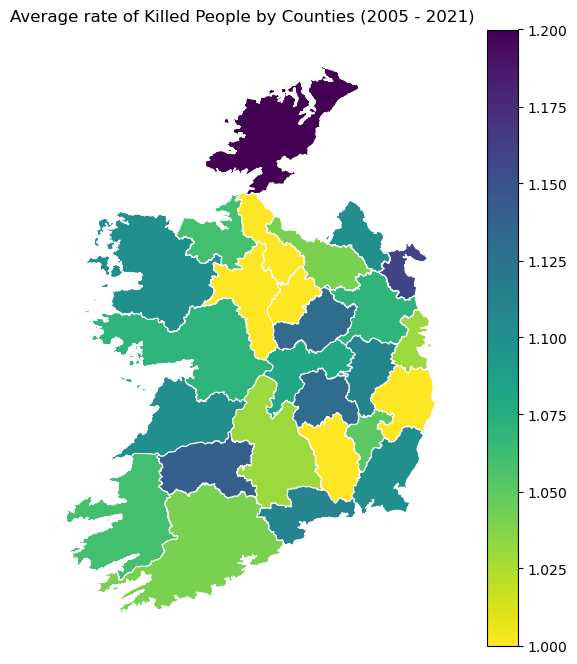

In [65]:
# Convert the dataset into a GeoDataFrame
map_df = gpd.GeoDataFrame(map_ie, geometry = map_ie['geometry'])

# Plotting the choropleth map
fig, ax = plt.subplots(1, figsize = (8, 8))
map_df.plot(column = '% Killed', cmap = 'viridis_r', linewidth=0.8, ax = ax, edgecolor = '1', legend = True)

# Remove the axis
ax.axis('off')

# Add a title
ax.set_title('Average rate of Killed People by Counties (2005 - 2021)', fontdict = {'fontsize': '12'})
             
# Display the map
plt.show()